In [1]:
# Author(s): Haley Botteron, Haley Acevedo
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import stats
from glob import glob

def get_combined_data_array(file_list):
    return [ np.genfromtxt(f, usecols=1) for f in file_list ] # pull out values from second column of each file

def get_average_curve(all_subj_data):
    return np.mean(all_subj_data, axis=0) # axis argument tells it to average across rows (by timepoint, rather than by subject or all values)

def get_min_curve(all_subj_data):
    return np.min(all_subj_data, axis = 0)
def get_max_curve(all_subj_data):
    return np.max(all_subj_data, axis = 0)


discomfort_curve_files = glob('ResampledDiscomfort*AvgTrials.txt') # get all files in current directory matching pattern
all_subj_discomfort = get_combined_data_array(discomfort_curve_files)
avg_discomfort = get_average_curve(all_subj_discomfort)
min_discomfort = get_min_curve(all_subj_discomfort)
max_discomfort = get_max_curve(all_subj_discomfort)

effort_curve_files = glob('ResampledEffort*AvgTrials.txt')
all_subj_effort = get_combined_data_array(effort_curve_files)
avg_effort = get_average_curve(all_subj_effort)
min_effort = get_min_curve(all_subj_effort)
max_effort = get_max_curve(all_subj_effort)


# assuming all of the files have the same time bins, grab the x-axis from the one of them
time = np.genfromtxt(discomfort_curve_files[0], usecols=0)

plt.plot(time, avg_discomfort, '-', label='avg discomfort')
plt.plot(time, avg_effort, '--', label='avg effort')
plt.plot(time, min_effort, '--', label='min effort',color = '0.5')
plt.plot(time, max_effort, '--', label='max effort',color = '0.5')
plt.plot(time, min_discomfort, '-', label='min discomfort',color = '0.5')
plt.plot(time, max_discomfort, '-', label='max discomfort',color = '0.5')
plt.legend()
plt.show()


scipy.stats.pearsonr(avg_effort, avg_discomfort)





<Figure size 640x480 with 1 Axes>

(0.9627276599159128, 2.1941003185933504e-205)

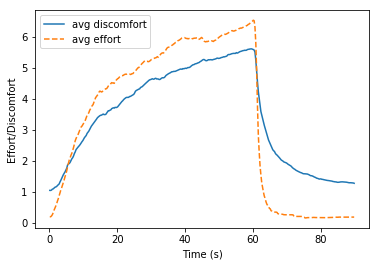

(0.9624505749439046, 8.057167173642225e-205)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import stats
from glob import glob

def get_combined_data_array(file_list):
    return [ np.genfromtxt(f, usecols=1) for f in file_list if 'TM209' not in f ] # pull out values from second column of each file

def get_average_curve(all_subj_data):
    return np.mean(all_subj_data, axis=0) # axis argument tells it to average across rows (by timepoint, rather than by subject or all values)

def get_min_curve(all_subj_data):
    return np.min(all_subj_data, axis = 0)
def get_max_curve(all_subj_data):
    return np.max(all_subj_data, axis = 0)


discomfort_curve_files = glob('ResampledDiscomfort*AvgTrials.txt') # get all files in current directory matching pattern
all_subj_discomfort = get_combined_data_array(discomfort_curve_files)
avg_discomfort = get_average_curve(all_subj_discomfort)
min_discomfort = get_min_curve(all_subj_discomfort)
max_discomfort = get_max_curve(all_subj_discomfort)

effort_curve_files = glob('ResampledEffort*AvgTrials.txt')
all_subj_effort = get_combined_data_array(effort_curve_files)
avg_effort = get_average_curve(all_subj_effort)
min_effort = get_min_curve(all_subj_effort)
max_effort = get_max_curve(all_subj_effort)


# assuming all of the files have the same time bins, grab the x-axis from the one of them
time = np.genfromtxt(discomfort_curve_files[0], usecols=0)

plt.plot(time, avg_discomfort, '-', label='avg discomfort')
plt.plot(time, avg_effort, '--', label='avg effort')
#plt.plot(time, min_effort, '--', label='min effort',color = '0.5')
#plt.plot(time, max_effort, '--', label='max effort',color = '0.5')
#plt.plot(time, min_discomfort, '-', label='min discomfort',color = '0.5')
#plt.plot(time, max_discomfort, '-', label='max discomfort',color = '0.5')
plt.ylabel('Effort/Discomfort')
plt.xlabel('Time (s)')
plt.legend()
plt.show()


scipy.stats.pearsonr(avg_effort, avg_discomfort)





In [3]:
print(len(discomfort_curve_files))
print(len(effort_curve_files))

29
30


In [4]:
import re

def get_subjects(file_list):
    return [ re.search('(TM\d{3})Avg', f).group(1) for f in file_list ]

print([ s for s in get_subjects(effort_curve_files) if s not in get_subjects(discomfort_curve_files)])

['TM209']
